In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder

rawdata = pd.read_csv('../input/dubizzle-used-car-sale-data/data.csv')

In [2]:
dataset = rawdata.copy()
dataset.head()

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
0,MITSUBISHI PAJERO 3.5L / 2013,"26,000",167390,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,Unknown,Gasoline,Left Hand Side,2013.0,Silver,Dubai,GLS,mitsubishi,pajero,13/05/2022
1,chevrolet silverado,"110,000",39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,"78,000",200000,Perfect inside and out,Perfect inside and out,Dealer,Sedan,6,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class,05/05/2022
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,"899,000",27000,Perfect inside and out,Perfect inside and out,Dealer,Hard Top Convertible,8,Automatic Transmission,GCC Specs,600 - 700 HP,Gasoline,Left Hand Side,2018.0,Red,Dubai,Standard,ferrari,488-spider,30/04/2022
4,USED RENAULT DOKKER 2020,"33,000",69000,Perfect inside and out,Perfect inside and out,Owner,Wagon,4,Manual Transmission,GCC Specs,Less than 150 HP,Gasoline,Left Hand Side,2020.0,White,Dubai,Standard,renault,dokker,13/05/2022


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9970 entries, 0 to 9969
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 9965 non-null   object 
 1   price_in_aed          9970 non-null   object 
 2   kilometers            9970 non-null   int64  
 3   body_condition        9970 non-null   object 
 4   mechanical_condition  9970 non-null   object 
 5   seller_type           9970 non-null   object 
 6   body_type             9970 non-null   object 
 7   no_of_cylinders       9911 non-null   object 
 8   transmission_type     9970 non-null   object 
 9   regional_specs        9970 non-null   object 
 10  horsepower            9970 non-null   object 
 11  fuel_type             9970 non-null   object 
 12  steering_side         9970 non-null   object 
 13  year                  9000 non-null   float64
 14  color                 9970 non-null   object 
 15  emirate              

In [4]:
dataset['year'] = dataset['year'].astype('datetime64[ns]')
dataset['date_posted'] = dataset['date_posted'].astype('datetime64[ns]')
age = ((dataset.date_posted - dataset.year).dt.days / 365)
dataset = dataset.assign(car_age = age)

In [5]:
dataset['horsepower'] = dataset['horsepower'].replace('Unknown', np.nan)
dataset['price_in_aed'] = dataset['price_in_aed'].str.replace(',', '').astype(np.float64)

In [6]:
dataset.drop(['title', 'date_posted', 'year'], axis=1, inplace=True)
dataset.dropna(inplace=True)

In [7]:
data = dataset.copy()

In [8]:
data['horsepower'] = data['horsepower'].map({'Less than 150 HP': 75, '150 - 200 HP': 175, '200 - 300 HP': 250, '300 - 400 HP': 350, '400 - 500 HP': 450,
                                             '500 - 600 HP': 550,     '600 - 700 HP': 650, '700 - 800 HP': 750, '800 - 900 HP': 850, '900+ HP': 950})

In [9]:
log_price = np.log(data['price_in_aed'])
data = data.assign(log_price=log_price)

data.drop('price_in_aed', axis=1, inplace=True)

In [10]:
for col in data.select_dtypes('object'):
    encodings = data.groupby(col)['log_price'].mean().reset_index()
    data = data.merge(encodings, how='left', on=col)
    data.drop(col, axis=1, inplace=True)
    for old_col_name, new_col_name in zip(['log_price_x', 'log_price_y'], ['log_price', f'enc_{col}']):
        data = data.rename(columns = {old_col_name:new_col_name})

In [11]:
data.head()

,kilometers,horsepower,car_age,log_price,enc_body_condition,enc_mechanical_condition,enc_seller_type,enc_body_type,enc_no_of_cylinders,enc_transmission_type,enc_regional_specs,enc_fuel_type,enc_steering_side,enc_color,enc_emirate,enc_motors_trim,enc_company,enc_model
0,39000,450,52.068493,11.608236,11.583957,11.573259,11.728154,11.619596,11.984621,11.569044,11.329477,11.555994,11.56029,11.479989,11.204826,11.854474,11.121913,11.509446
1,200000,450,52.372603,11.264464,11.583957,11.573259,11.728154,11.262608,11.434617,11.569044,11.516012,11.555994,11.56029,11.656814,11.204826,11.787517,12.042730,11.510716
2,27000,650,52.358904,13.709038,11.583957,11.573259,11.728154,12.221032,11.984621,11.569044,11.516012,11.555994,11.56029,11.613259,11.633588,12.140117,13.708262,13.902247
3,69000,75,52.394521,10.404263,11.583957,11.573259,11.123438,11.688758,11.075545,11.314369,11.516012,11.555994,11.56029,11.479989,11.633588,12.140117,10.500683,10.306721
4,84000,250,52.358904,11.492723,11.583957,11.573259,11.123438,11.262608,11.434617,11.569044,11.516012,11.555994,11.56029,11.337130,11.633588,11.065883,11.467361,11.340549


In [12]:
log_km = np.log(data['kilometers'])
data = data.assign(log_km=log_km)

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [13]:
data.log_km.replace([np.inf, -np.inf], 0, inplace=True)
data.drop('kilometers', axis=1, inplace=True)

In [14]:
data.describe()

,horsepower,car_age,log_price,enc_body_condition,enc_mechanical_condition,enc_seller_type,enc_body_type,enc_no_of_cylinders,enc_transmission_type,enc_regional_specs,enc_fuel_type,enc_steering_side,enc_color,enc_emirate,enc_motors_trim,enc_company,enc_model,log_km
count,8223.000000,8223.000000,8223.000000,8223.000000,8223.000000,8223.000000,8223.000000,8223.000000,8223.000000,8223.000000,8223.000000,8223.000000,8223.000000,8223.000000,8223.000000,8223.000000,8223.000000,8223.000000
mean,338.015323,52.401114,11.560248,11.560248,11.560248,11.560248,11.560248,11.560248,11.560248,11.560248,11.560248,11.560248,11.560248,11.560248,11.560248,11.560248,11.560248,10.719722
std,149.881434,0.331312,1.042355,0.120261,0.103357,0.317145,0.333630,0.525043,0.046508,0.334367,0.050293,0.002702,0.214668,0.161881,0.645861,0.698290,0.865818,2.227891
min,75.000000,49.213699,8.699515,10.618818,9.867874,11.123438,10.856182,10.858885,11.314369,11.068091,11.555994,11.387025,10.887153,10.743785,9.472705,9.852194,9.104869,0.000000
25%,250.000000,52.249315,10.799576,11.583957,11.573259,11.123438,11.262608,11.075545,11.569044,11.516012,11.555994,11.560290,11.479989,11.633588,11.174155,11.148777,10.976344,10.518673
50%,350.000000,52.347945,11.461632,11.583957,11.573259,11.728154,11.619596,11.434617,11.569044,11.516012,11.555994,11.560290,11.613259,11.633588,11.639289,11.298115,11.510716,11.350407
75%,450.000000,52.624658,12.154779,11.583957,11.573259,11.728154,11.619596,11.984621,11.569044,11.516012,11.555994,11.560290,11.658342,11.633588,11.787517,12.042730,11.908731,11.839697
max,950.000000,52.958904,16.523494,11.583957,11.573259,12.485567,12.360619,13.503228,11.569044,13.211090,12.519740,11.560290,12.614934,12.100712,15.325623,14.121189,16.523494,18.560443


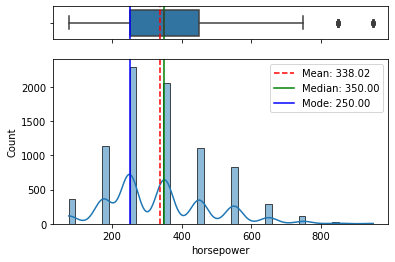

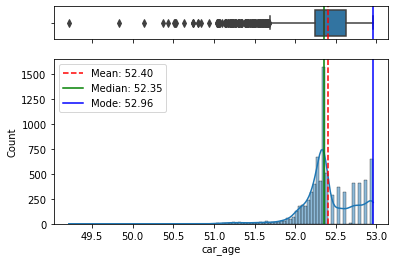

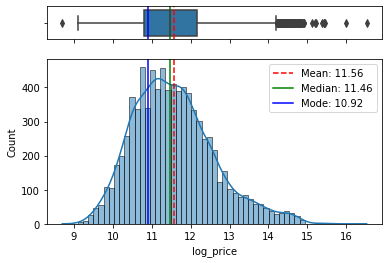

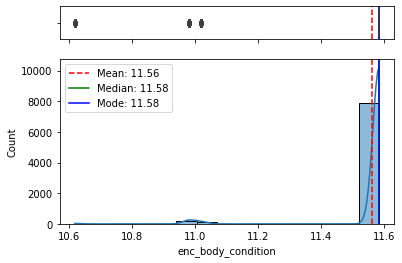

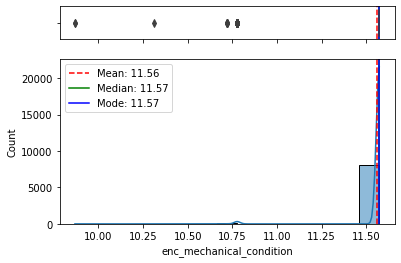

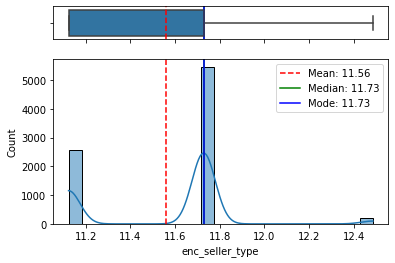

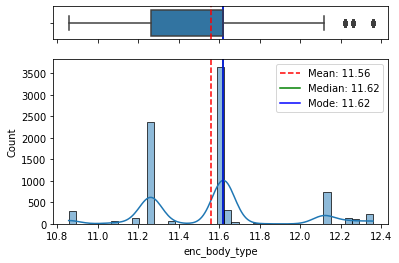

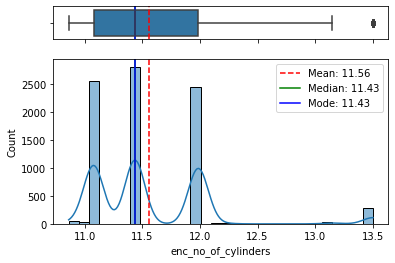

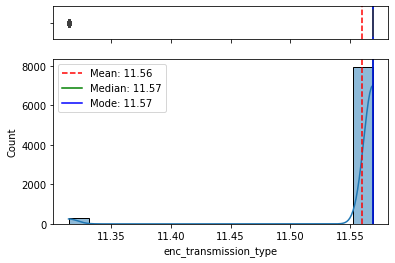

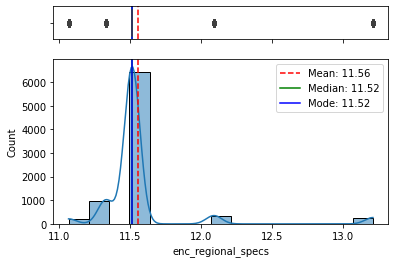

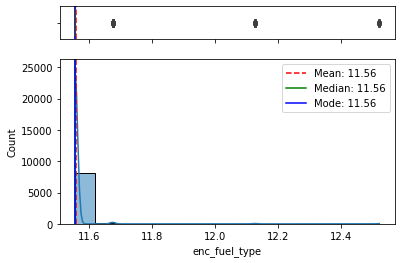

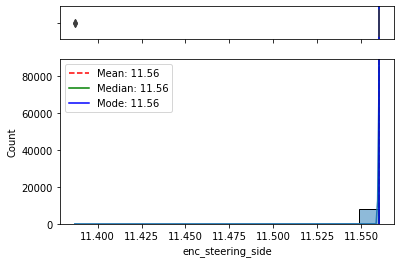

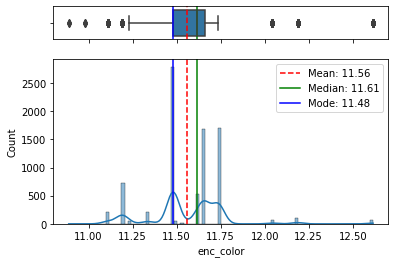

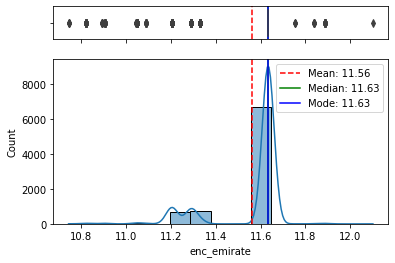

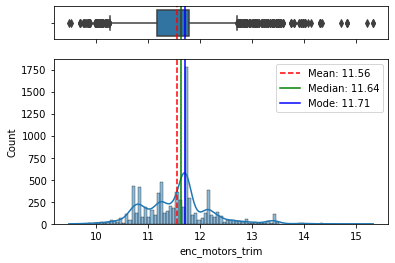

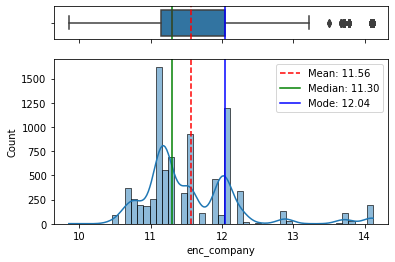

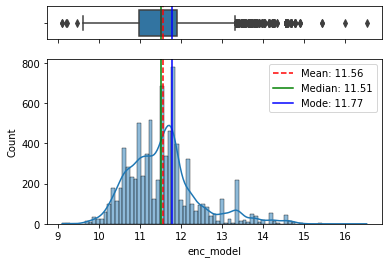

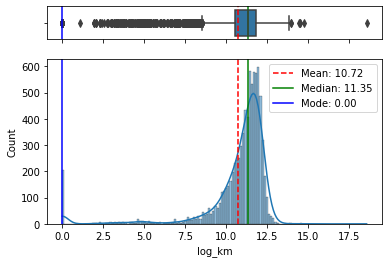

In [15]:
import seaborn as sns
def median_mode_mean(df, column):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex='all', gridspec_kw={"height_ratios": (0.2, 1)})
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode().values[0]

    sns.boxplot(data=df, x=column, ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')
    ax_box.axvline(mode, color='b', linestyle='-')

    sns.histplot(data=df, x=column, ax=ax_hist, kde=True)
    ax_hist.axvline(mean, color='r', linestyle='--', label=f"Mean: {mean:.2f}")
    ax_hist.axvline(median, color='g', linestyle='-', label=f"Median: {median:.2f}")
    ax_hist.axvline(mode, color='b', linestyle='-', label=f"Mode: {mode:.2f}")

    ax_hist.legend()

    ax_box.set(xlabel='')
    plt.show()

for col in data.columns.values:
    median_mode_mean(data, col)


In [16]:
for col in data:
    print(f'{col} skewness: {data[col].skew()}')

horsepower skewness: 0.7310280121592557
car_age skewness: -0.7717243539603136
log_price skewness: 0.6260243758911944
enc_body_condition skewness: -5.082067393603681
enc_mechanical_condition skewness: -8.144975838546102
enc_seller_type skewness: -0.05804436849243184
enc_body_type skewness: 0.46845248626310415
enc_no_of_cylinders skewness: 1.7145788300725882
enc_transmission_type skewness: -5.098968830611155
enc_regional_specs skewness: 3.853021644260161
enc_fuel_type skewness: 15.564928314927718
enc_steering_side skewness: -64.10927885346064
enc_color skewness: 0.6811210799484251
enc_emirate skewness: -1.8907640495749318
enc_motors_trim skewness: 0.6856201092219392
enc_company skewness: 1.6278180492055956
enc_model skewness: 0.9994463548530282
log_km skewness: -3.3541931594645717


In [17]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
new_data_sc = sc.fit_transform(data)
new_data = pd.DataFrame(new_data_sc, columns=data.columns)
new_data.describe()

,horsepower,car_age,log_price,enc_body_condition,enc_mechanical_condition,enc_seller_type,enc_body_type,enc_no_of_cylinders,enc_transmission_type,enc_regional_specs,enc_fuel_type,enc_steering_side,enc_color,enc_emirate,enc_motors_trim,enc_company,enc_model,log_km
count,8223.000000,8223.000000,8223.000000,8223.000000,8223.000000,8223.000000,8223.000000,8223.000000,8223.000000,8223.000000,8223.000000,8223.000000,8223.000000,8223.000000,8223.000000,8223.000000,8223.000000,8223.000000
mean,-0.059923,0.141654,0.072768,-0.023709,-0.013011,-0.277661,-0.166247,0.138197,-0.008796,0.044236,0.004254,-0.000042,-0.297223,-0.073340,-0.128865,0.293229,0.053124,-0.477421
std,0.749407,0.882691,0.769150,0.120261,0.103357,0.524453,0.934568,0.577557,0.046508,0.334367,0.050293,0.002702,1.203612,0.161881,1.052986,0.781125,0.928604,1.686488
min,-1.375000,-8.350365,-2.038157,-0.965139,-1.705386,-1.000000,-2.138486,-0.633315,-0.254675,-0.447921,0.000000,-0.173265,-4.071167,-0.889803,-3.532313,-1.617445,-2.580311,-8.592127
25%,-0.500000,-0.262774,-0.488529,0.000000,0.000000,-1.000000,-1.000000,-0.394986,0.000000,0.000000,0.000000,0.000000,-0.747224,0.000000,-0.758335,-0.167054,-0.573122,-0.629613
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.737226,0.511471,0.000000,0.000000,0.000000,0.000000,0.605014,0.000000,0.000000,0.000000,0.000000,0.252776,0.000000,0.241665,0.832946,0.426878,0.370387
max,3.000000,1.627737,3.735130,0.000000,0.000000,1.252509,2.075761,2.275510,0.000000,1.695078,0.963746,0.000000,5.616242,0.467124,6.010053,3.157965,5.376286,5.457915


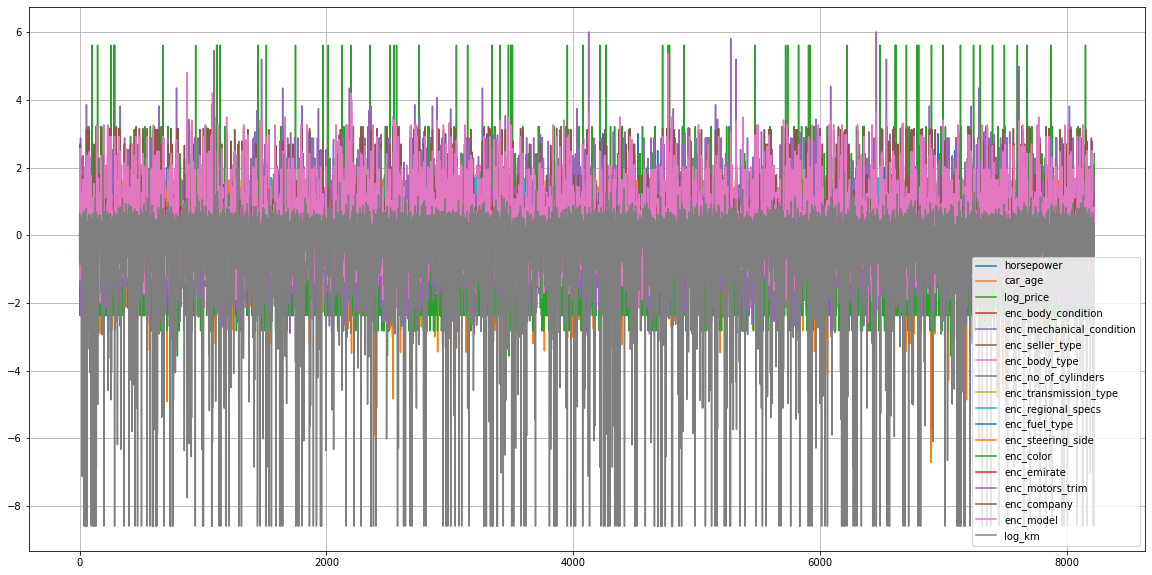

In [18]:
plt.figure(figsize=(20,10))
plt.plot(new_data)
plt.legend(new_data.columns)
plt.grid(True)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
X = new_data.drop(['log_price'], axis=1)
y = new_data.log_price

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

### Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


print(f'model score on training data: {lr.score(X_train, y_train)}')
print(f'model score on testing data: {lr.score(X_test, y_test)}')

model score on training data: 0.7898901888381029
model score on testing data: 0.7842078298038413


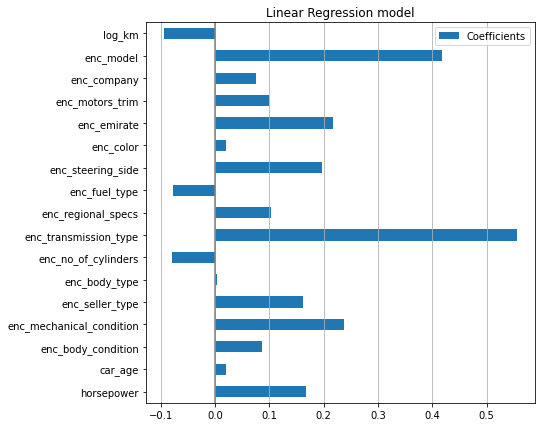

In [21]:
import matplotlib.pyplot as plt

coefs = pd.DataFrame(
    lr.coef_,
    columns=['Coefficients'], index=X_train.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Linear Regression model')
plt.axvline(x=0, color='.5')
plt.grid(visible=True, which='major', axis='x')
plt.subplots_adjust(left=.3)

(0.0, 2.0)

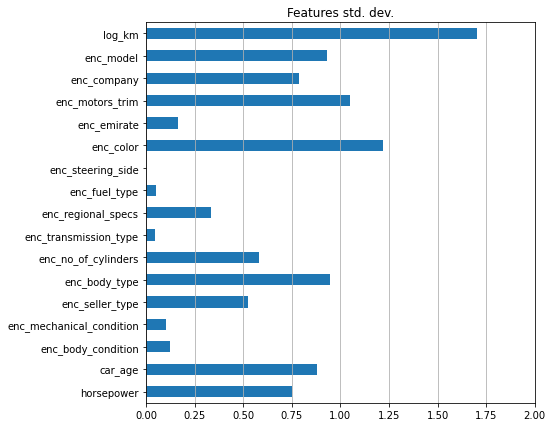

In [22]:
X_train.std(axis=0).plot(kind='barh', figsize=(9, 7))
plt.title('Features std. dev.')
plt.subplots_adjust(left=.3)
plt.grid(visible=True, which='major', axis='x')
plt.xlim((0, 2))

In [23]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error

y_pred = lr.predict(X_test)
print('test_score = ',lr.score(X_test,y_test))
print('R2   ======= ',r2_score(y_test, y_pred))
print('MAE  ======= ',mean_squared_error(y_test, y_pred))
print('RMSE ======= ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE  ======= ', mean_absolute_error(y_test, y_pred))
print('Median  === ', median_absolute_error(y_test, y_pred))

test_score =  0.7842078298038413
R2   =======  0.7842078298038413
MAE  =======  0.12403979262650489
RMSE =======  0.35219283443378696
MAE  =======  0.27246656720404966
Median  ===  0.21162315778801655


### RidgeCV Regressor

In [24]:
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

rcv_model = make_pipeline(StandardScaler(), RidgeCV())
rcv_model.fit(X_train, y_train)


print(f'model score on training data: {rcv_model.score(X_train, y_train)}')
print(f'model score on testing data: {rcv_model.score(X_test, y_test)}')

model score on training data: 0.7898882080351715
model score on testing data: 0.7842090728386164


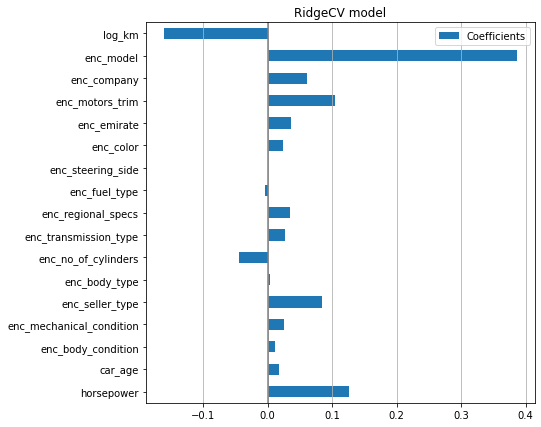

In [25]:
coefs = pd.DataFrame(
    rcv_model[1].coef_,
    columns=['Coefficients'], index=X_train.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('RidgeCV model')
plt.axvline(x=0, color='.5')
plt.grid(visible=True, which='major', axis='x')
plt.subplots_adjust(left=.3)

In [26]:
y_pred = lr.predict(X_test)
print('test_score = ',rcv_model.score(X_test,y_test))
print('R2   ======= ',r2_score(y_test, y_pred))
print('MAE  ======= ',mean_squared_error(y_test, y_pred))
print('RMSE ======= ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE  ======= ', mean_absolute_error(y_test, y_pred))
print('Median  === ', median_absolute_error(y_test, y_pred))

test_score =  0.7842090728386164
R2   =======  0.7842078298038413
MAE  =======  0.12403979262650489
RMSE =======  0.35219283443378696
MAE  =======  0.27246656720404966
Median  ===  0.21162315778801655


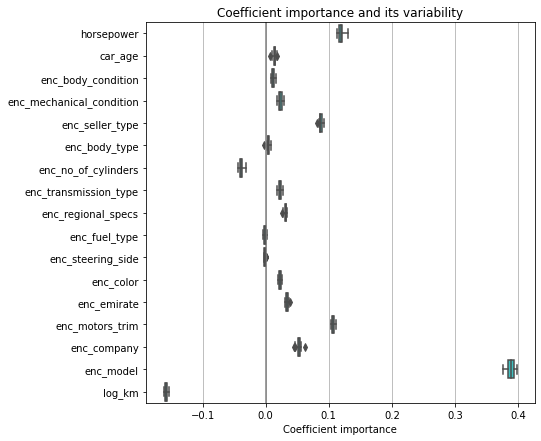

In [27]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
import seaborn as sns

cv_model = cross_validate(
    rcv_model, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=5),
    return_estimator=True, n_jobs=2
)
coefs = pd.DataFrame(
    [model[1].coef_
     for model in cv_model['estimator']],
    columns=X.columns
)
plt.figure(figsize=(9, 7))
sns.boxplot(data=coefs, orient='h', color='cyan', saturation=0.5)
plt.grid(visible=True, which='major', axis='x')
plt.axvline(x=0, color='.5')
plt.xlabel('Coefficient importance')
plt.title('Coefficient importance and its variability')
plt.grid(visible=True, which='major', axis='x')
plt.subplots_adjust(left=.3)

### Lasso

In [28]:
from sklearn.linear_model import Lasso

lasso_model = make_pipeline(StandardScaler(), Lasso(alpha=.015))
lasso_model.fit(X_train, y_train)

print(f'model score on training data: {lasso_model.score(X_train, y_train)}')
print(f'model score on testing data: {lasso_model.score(X_test, y_test)}')


model score on training data: 0.7855070869283158
model score on testing data: 0.7841610081521445


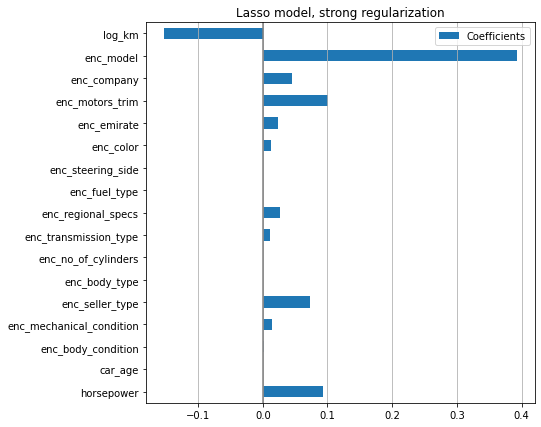

In [29]:
coefs = pd.DataFrame(
    lasso_model[1].coef_,
    columns=['Coefficients'], index=X_train.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Lasso model, strong regularization')
plt.axvline(x=0, color='.5')
plt.grid(visible=True, which='major', axis='x')
plt.subplots_adjust(left=.3)

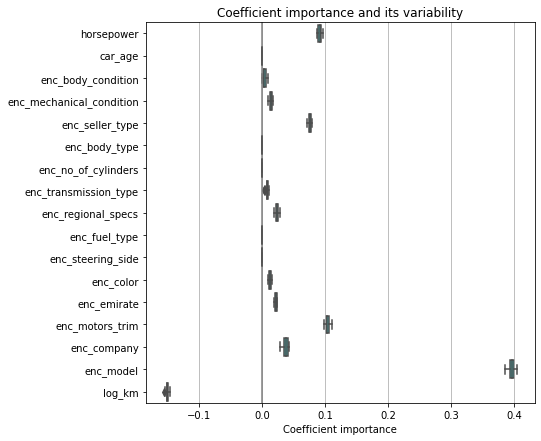

In [30]:
cv_model = cross_validate(
    lasso_model, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=5),
    return_estimator=True, n_jobs=2
)
coefs = pd.DataFrame(
    [model[1].coef_
     for model in cv_model['estimator']],
    columns=X.columns
)
plt.figure(figsize=(9, 7))
sns.boxplot(data=coefs, orient='h', color='cyan', saturation=0.5)
plt.axvline(x=0, color='.5')
plt.xlabel('Coefficient importance')
plt.title('Coefficient importance and its variability')
plt.grid(visible=True, which='major', axis='x')
plt.subplots_adjust(left=.3)

In [31]:
y_pred = lr.predict(X_test)
print('test_score = ',lasso_model.score(X_test,y_test))
print('R2   ======= ',r2_score(y_test, y_pred))
print('MAE  ======= ',mean_squared_error(y_test, y_pred))
print('RMSE ======= ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE  ======= ', mean_absolute_error(y_test, y_pred))
print('Median  ==== ', median_absolute_error(y_test, y_pred))

test_score =  0.7841610081521445
R2   =======  0.7842078298038413
MAE  =======  0.12403979262650489
RMSE =======  0.35219283443378696
MAE  =======  0.27246656720404966
Median  ====  0.21162315778801655


### Random Forest Regressor

In [32]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

print(f'model score on training data: {rfr.score(X_train, y_train)}')
print(f'model score on testing data: {rfr.score(X_test, y_test)}')

model score on training data: 0.9840792004572997
model score on testing data: 0.8783459523461026


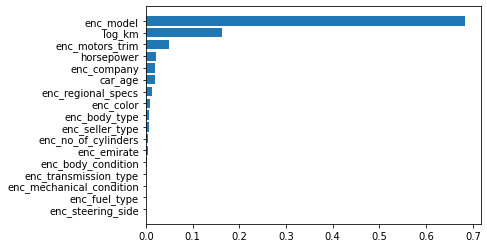

In [33]:
importances = rfr.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

In [34]:
from sklearn.feature_selection import RFE
rfe = RFE(rfr, n_features_to_select=8)
rfe.fit(X_train, y_train)
print("Sélection de variables", rfe.support_)
print("Classement de variables", rfe.ranking_)
print("Variables sélectionnées :", list(X.columns[rfe.support_]))

Sélection de variables [ True  True False False False False False False  True False False  True
 False  True  True  True  True]
Classement de variables [ 1  1  6  8  3  2  4  7  1  9 10  1  5  1  1  1  1]
Variables sélectionnées : ['horsepower', 'car_age', 'enc_regional_specs', 'enc_color', 'enc_motors_trim', 'enc_company', 'enc_model', 'log_km']


In [35]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)
print(X_train.shape, X_train_rfe.shape)
print(X_test.shape, X_test_rfe.shape)

(6167, 17) (6167, 8)
(2056, 17) (2056, 8)


In [36]:
rfr.fit(X_train_rfe, y_train)
y_pred = rfr.predict(X_test_rfe)
print('test_score = ',rfr.score(X_test_rfe,y_test))
print('R2   ======= ',r2_score(y_test, y_pred))
print('MAE  ======= ',mean_squared_error(y_test, y_pred))
print('RMSE ======= ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE  ======= ', mean_absolute_error(y_test, y_pred))
print('Meadian  === ', median_absolute_error(y_test, y_pred))

test_score =  0.8710171559735332
R2   =======  0.8710171559735332
MAE  =======  0.07414080506663605
RMSE =======  0.2722880920397292
MAE  =======  0.19568718468014654
Meadian  ===  0.13864912216562064


In [37]:
from sklearn.svm import SVR
svr = SVR()
svr_fit =svr.fit(X_train,y_train)

In [38]:
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
print('test_score = ',svr.score(X_test,y_test))
print('R2   ======= ',r2_score(y_test, y_pred))
print('MAE  ======= ',mean_squared_error(y_test, y_pred))
print('RMSE ======= ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE  ======= ', mean_absolute_error(y_test, y_pred))
print('Meadian  === ', median_absolute_error(y_test, y_pred))

test_score =  0.8658491404222592
R2   =======  0.8658491404222592
MAE  =======  0.07711143915724214
RMSE =======  0.2776894653335667
MAE  =======  0.20992300237497746
Meadian  ===  0.1609596120670384


In [39]:
from sklearn import metrics
from tabulate import tabulate

lr_predict = lr.predict(X_test)
rcv_predict = rcv_model.predict(X_test)
rfr_predict = rfr.predict(X_test_rfe)
lasso_predict = lasso_model.predict(X_test)
svr_predict = svr.predict(X_test)

# assign data
stb_score_comp = [
    ["Linear Regression", metrics.mean_squared_error(y_test, lr_predict),np.sqrt(metrics.mean_squared_error(y_test, lr_predict)),round(metrics.r2_score(y_test, lr_predict),2)],
    ["RigedCV", metrics.mean_squared_error(y_test, rcv_predict),np.sqrt(metrics.mean_squared_error(y_test, rcv_predict)),round(metrics.r2_score(y_test, rcv_predict),2)],
    ["Random Forest", metrics.mean_squared_error(y_test, rfr_predict),np.sqrt(metrics.mean_squared_error(y_test, rfr_predict)),round(metrics.r2_score(y_test, rfr_predict),2)],
    ["Lasso", metrics.mean_squared_error(y_test, lasso_predict),np.sqrt(metrics.mean_squared_error(y_test, lasso_predict)),round(metrics.r2_score(y_test, lasso_predict),2)],
    ["SVM", metrics.mean_squared_error(y_test, svr_predict),np.sqrt(metrics.mean_squared_error(y_test, svr_predict)),round(metrics.r2_score(y_test, svr_predict),2)],
]

# create header
head = ["Type of Regression", "Mean Square Error", "Root Mean Square Error", "R2-Score"]

# display table
print(tabulate(stb_score_comp, headers=head, tablefmt="grid"))


+----------------------+---------------------+--------------------------+------------+
| Type of Regression   |   Mean Square Error |   Root Mean Square Error |   R2-Score |
+======================+=====================+==========================+============+
| Linear Regression    |           0.12404   |                 0.352193 |       0.78 |
+----------------------+---------------------+--------------------------+------------+
| RigedCV              |           0.124039  |                 0.352192 |       0.78 |
+----------------------+---------------------+--------------------------+------------+
| Random Forest        |           0.0741408 |                 0.272288 |       0.87 |
+----------------------+---------------------+--------------------------+------------+
| Lasso                |           0.124067  |                 0.352231 |       0.78 |
+----------------------+---------------------+--------------------------+------------+
| SVM                  |           0.077111